Dibujaremos soluciones analíticas de la ecuación de Friedmann:

$
\begin{cases}
\frac{\dot{a}}{a} = H_0 \sqrt{\Omega_m^{0} a^{-3} + \Omega_r^{0} a^{-4} + \Omega_k^{0} a^{-2} + \Omega_\Lambda^{0}}\\
a(t_0) = 1
\end{cases}
$

Tomaremos la constante de Hubble como $H_0 = 67 \: (km/s)/Mpc$

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

KM_MP = 3.24078E-20    #Conversion de Kilometro a Megaparsec
S_GYEAR = 3.17098E-17  #Conversion de Segundo a G_año (mil millones de años)
H0 = (67 * KM_MP) / S_GYEAR #Reescalamos H0 para que los graficos queden en G_años

## Universos espacialmente planos de un solo componente

### Universo con materia

$
\Omega_k^{0} = \Omega_r^{0} = \Omega_\Lambda^{0} = 0, \quad \Omega_m^{0} = 1 \Rightarrow a(t) = \left(\frac{3}{2}H_0\left( t - t_0\right) + 1\right)^{\frac{2}{3}}
$

### Universo con radiación

$
\Omega_k^{0} = \Omega_m^{0} = \Omega_\Lambda^{0} = 0, \quad \Omega_r^{0} = 1 \Rightarrow a(t) = \sqrt{2H_0\left(t-t_0\right) + 1}
$

### Universo vacío dominado por $\Lambda$

$
\Omega_k^{0} = \Omega_m^{0} = \Omega_r^{0} = 0, \quad \Omega_\Lambda^{0} = 1 \Rightarrow a(t) = e^{H_0\left(t-t_0\right)}
$

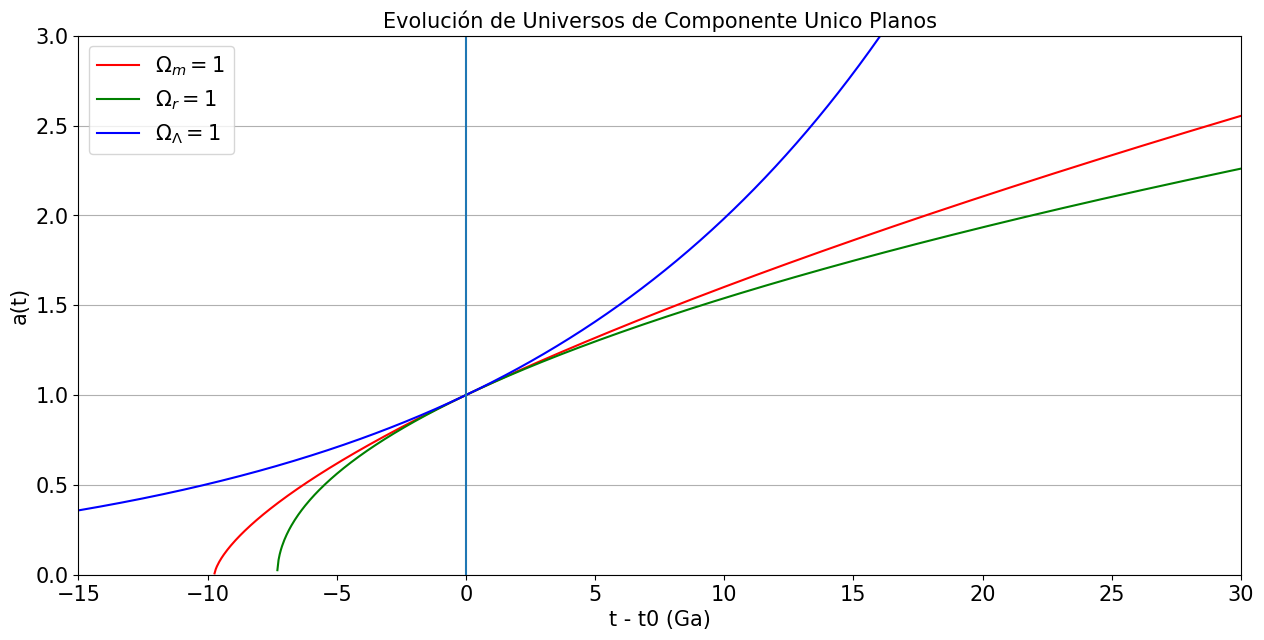

In [8]:
t = np.linspace(-15, 30, 1000)

#Funciones analíticas para a(t)
materia = np.power(3/2 * H0 * t + 1,2/3)
radiacion = np.sqrt(2*H0*t + 1)
Lambda = np.exp(H0*t)


#Dibujamos las gráficas
plt.figure(figsize=(15,7), dpi = 100) 
plt.title("Evolución de Universos de Componente Unico Planos", fontsize = 15)
plt.xlabel("t - t0 (Ga)", fontsize = 15)
plt.ylabel("a(t)", fontsize = 15)
        
plt.plot(t, materia, color='red', label = "$\Omega_m = 1$")
plt.plot(t, radiacion, color='green', label = "$\Omega_r = 1$")
plt.plot(t, Lambda, color='blue', label = "$\Omega_\Lambda = 1$")

plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="best", fontsize = 15)
plt.axvline(0)
plt.grid(axis="y")
plt.xlim([-15,30])
plt.ylim([0,3])
None

### Universos de materia con curvatura positiva ($k = +1$)

$
\Omega_0^{0} = \Omega_m^{0} > 1 , \quad \Omega_r^{0} = \Omega_\Lambda^{0} = 0
$

Las soluciones quedan en forma paramétrica en función de la distancia conforme $\eta$:

$
t = \frac{1}{2H_0}\frac{\Omega_0^{0}}{(\Omega_0^{0} - 1)^{\frac{3}{2}}} (\eta - \sin{(\eta)}), \quad a = \frac{1}{2}\frac{\Omega_0^{0}}{\Omega_0^{0} - 1} ( 1 - \cos{(\eta)}).
$

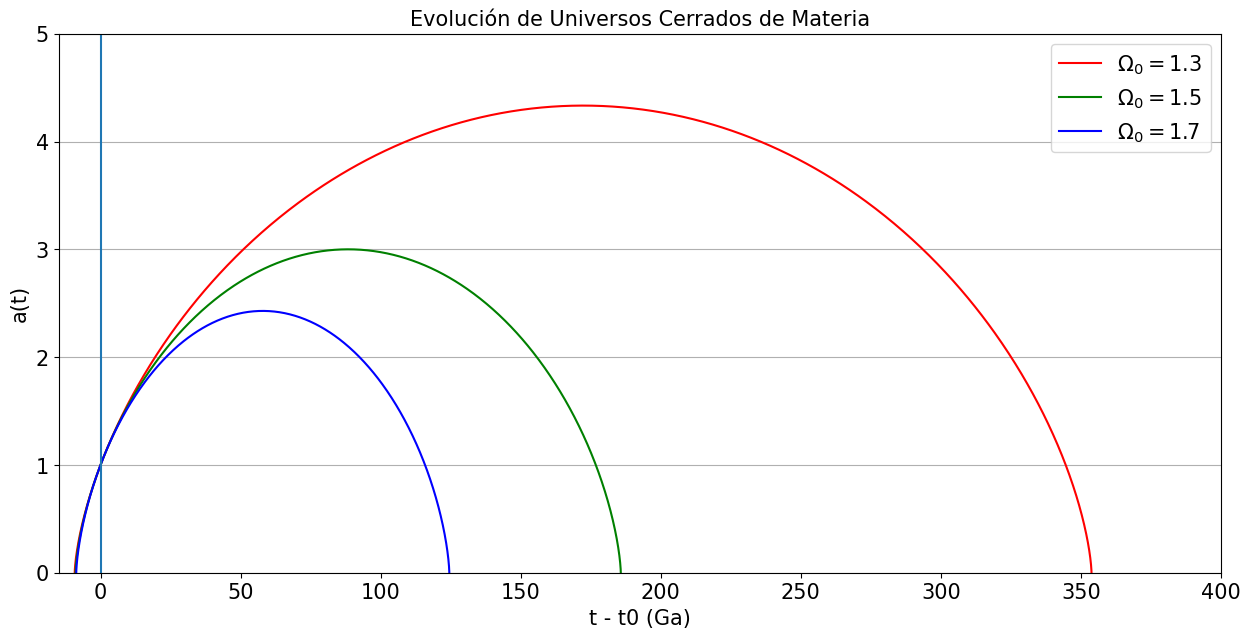

In [10]:
#Universos de materia con curvatura positiva

def parametrica_a_cerrado(omega, eta):
    return (1/2)*(omega/(omega-1))*(1-np.cos(eta))

def parametrica_t_cerrado(omega, eta):
    return (1/(2*H0))*(omega/(omega-1)**(3/2))*(eta-np.sin(eta))

def calcular_t0(omega):
    return (1/H0)*(omega/(2*(omega-1)**(3/2))*np.arccos((2-omega)/omega) -1/(omega-1))

plt.figure(figsize=(15,7), dpi = 100) 
plt.title("Evolución de Universos Cerrados de Materia", fontsize = 15)
plt.xlabel("t - t0 (Ga)", fontsize = 15)
plt.ylabel("a(t)", fontsize = 15)

eta = np.linspace(0, 2*np.pi, 1000)

omega = 1.3
t_0 = calcular_t0(omega)
cerrado_t = parametrica_t_cerrado(omega, eta) - t_0
cerrado_a = parametrica_a_cerrado(omega, eta)

plt.plot(cerrado_t , cerrado_a, color='red', label = "$\Omega_0 = 1.3$")

omega = 1.5
t_0 = calcular_t0(omega)
cerrado_t = parametrica_t_cerrado(omega, eta) - t_0
cerrado_a = parametrica_a_cerrado(omega, eta)

plt.plot(cerrado_t, cerrado_a, color='green', label = "$\Omega_0 = 1.5$")

omega = 1.7
t_0 = calcular_t0(omega)
cerrado_t = parametrica_t_cerrado(omega, eta) - t_0
cerrado_a = parametrica_a_cerrado(omega, eta)

plt.plot(cerrado_t, cerrado_a, color='blue', label = "$\Omega_0 = 1.7$")

plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="best", fontsize = 15)
plt.grid(axis="y")
plt.axvline(0)
plt.xlim([-15,400])
plt.ylim([0,5])
None

### Universos de materia con curvatura negativa ($k = -1$)

$
\Omega_0^{0} = \Omega_m^{0} < 1 , \quad \Omega_r^{0} = \Omega_\Lambda^{0} = 0
$

Las soluciones quedan en forma paramétrica en función de la distancia conforme $\eta$:

$
t = \frac{1}{2H_0}\frac{\Omega_0^{0}}{(1-\Omega_0^{0})^{\frac{3}{2}}} (\sinh{(\eta)} - \eta), \quad a = \frac{1}{2}\frac{\Omega_0^{0}}{1-\Omega_0^{0}}(\cosh{(\eta)} - 1).
$

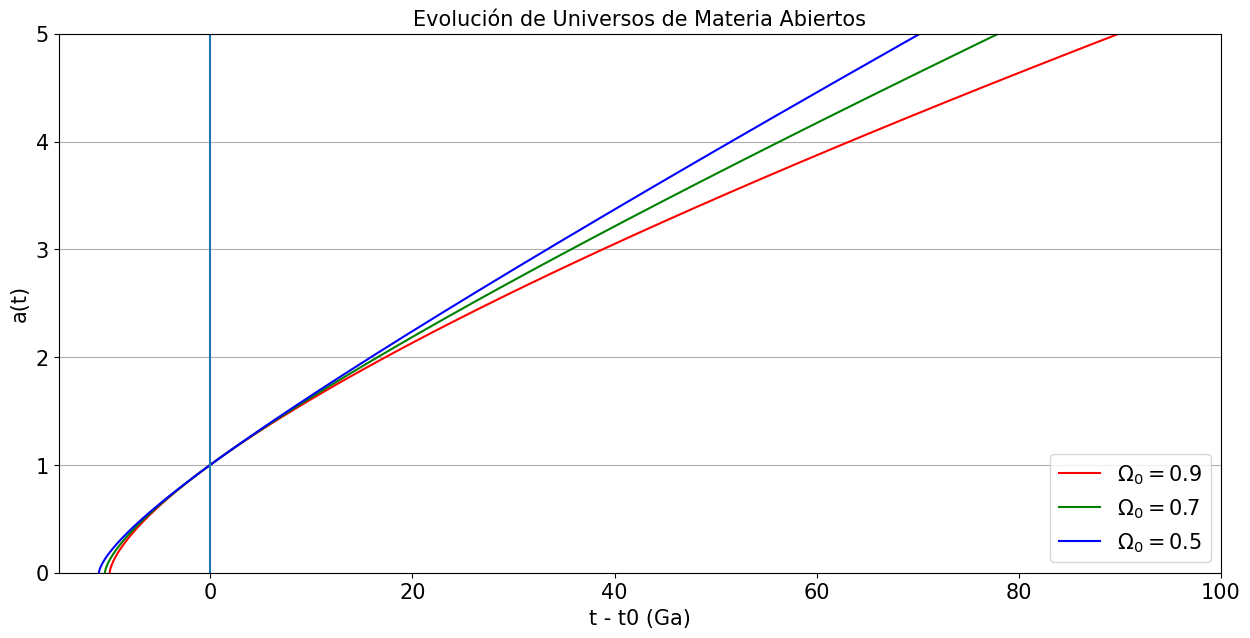

In [11]:
#Universos de materia con curvatura negativa

def parametrica_a_abierto(omega, eta):
    return (1/2)*(omega/(1-omega))*(np.cosh(eta) - 1)

def parametrica_t_abierto(omega, eta):
    return (1/(2*H0))*(omega/(1-omega)**(3/2))*(np.sinh(eta) - eta)

def calcular_t0(omega):
    return (1/H0)*(1/(1- omega) - omega/(2*(1-omega)**(3/2))*np.arccosh((2-omega)/omega))

plt.figure(figsize=(15,7), dpi = 100) 
plt.title("Evolución de Universos de Materia Abiertos", fontsize = 15)
plt.xlabel("t - t0 (Ga)", fontsize = 15)
plt.ylabel("a(t)", fontsize = 15)

eta = np.linspace(0, 10, 1000)

omega = 0.9
t_0 = calcular_t0(omega)
abierto_t = parametrica_t_abierto(omega, eta) - t_0
abierto_a = parametrica_a_abierto(omega, eta)

plt.plot(abierto_t , abierto_a, color='red', label = "$\Omega_0 = 0.9$")

omega = 0.7
t_0 = calcular_t0(omega)
abierto_t = parametrica_t_abierto(omega, eta) - t_0
abierto_a = parametrica_a_abierto(omega, eta)

plt.plot(abierto_t, abierto_a, color='green', label = "$\Omega_0 = 0.7$")

omega = 0.5
t_0 = calcular_t0(omega)
abierto_t = parametrica_t_abierto(omega, eta) - t_0
abierto_a = parametrica_a_abierto(omega, eta)

plt.plot(abierto_t, abierto_a, color='blue', label = "$\Omega_0 = 0.5$")

plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="best", fontsize = 15)
plt.grid(axis="y")
plt.axvline(0)
plt.xlim([-15,100])
plt.ylim([0,5])
None

## Universos espacialmente planos con materia y constante cosmológica $\Lambda$

$
\Omega_k^{0} = \Omega_r^{0} = 0, \quad \Omega_\Lambda^{0} = 1 - \Omega_m^{0} \Rightarrow a(t) = \sinh{\left(\frac{3\sqrt{\Omega_\Lambda^{0}}H_0}{2}\left(t-t_0\right) + arc sinh{\left(\sqrt{\frac{\Omega_\Lambda^{0}}{\Omega_m^{0}}} \right)} \right)}^{\frac{2}{3}}\left(\frac{\Omega_m^{0}}{\Omega_\Lambda^{0}} \right)^\frac{1}{3}
$

In [13]:
math.asinh(2)

1.4436354751788103

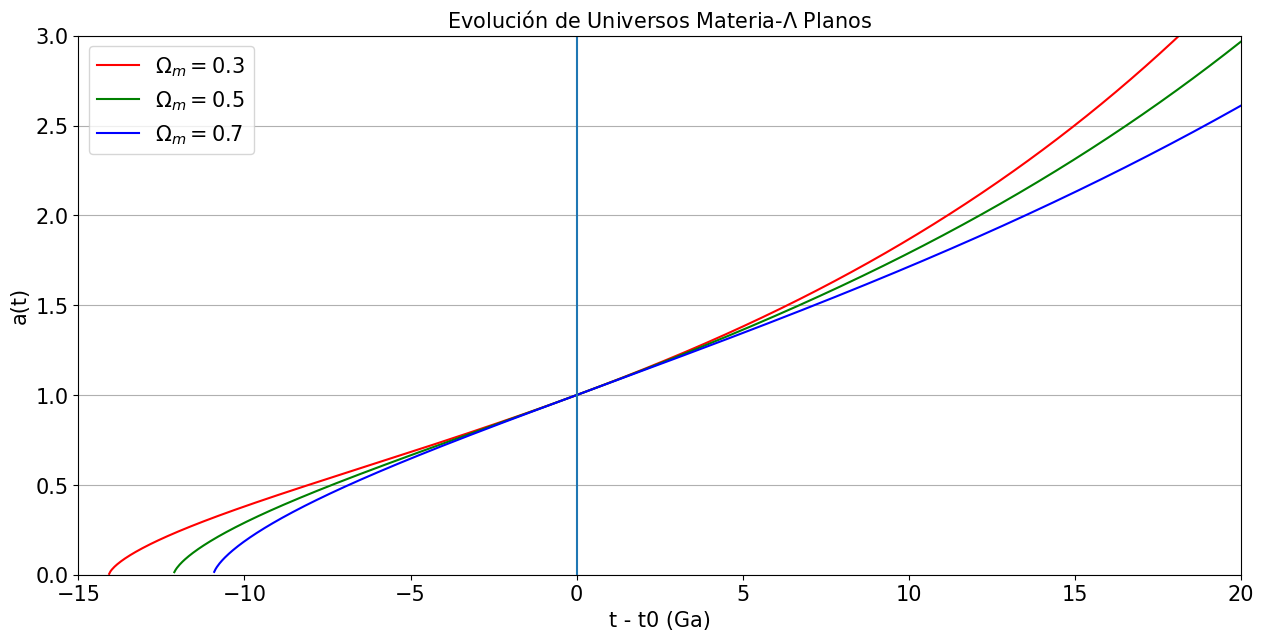

In [14]:
def solucion_lcdm(t, omega_m):
    omega_l = 1 - omega_m
    a = np.power(np.sinh((3*math.sqrt(omega_l)*H0/2)*t + math.asinh(math.sqrt(omega_l/omega_m))), 2/3)*(omega_m/omega_l)**(1/3)
    return a

t = np.linspace(-20, 20, 1000)

u1 = solucion_lcdm(t, 0.3)
u2 = solucion_lcdm(t, 0.5)
u3 = solucion_lcdm(t, 0.7)

#Dibujamos las gráficas
plt.figure(figsize=(15,7), dpi = 100) 
plt.title("Evolución de Universos Materia-$\Lambda$ Planos", fontsize = 15)
plt.xlabel("t - t0 (Ga)", fontsize = 15)
plt.ylabel("a(t)", fontsize = 15)
        
plt.plot(t, u1, color='red', label = "$\Omega_m = 0.3$")

plt.plot(t, u2, color='green', label = "$\Omega_m = 0.5$")

plt.plot(t, u3, color='blue', label = "$\Omega_m = 0.7$")

plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="best", fontsize = 15)
plt.axvline(0)
plt.grid(axis="y")
plt.xlim([-15,20])
plt.ylim([0,3])
None